# Proprocessing

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("data.csv")

df.head()

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/10/2019,"3,058,431,658.25"
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,14/03/2017,"2,972,782,699.76"
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,17/06/2017,"2,611,498,652.63"
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,27/01/2015,"2,547,475,510.49"
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,04/01/2021,"2,057,631,891.60"


In [7]:
# rename columns Reglement to amount
df.rename(columns={' Règlement': 'amount'}, inplace=True)

In [4]:
# check unique values for some columns
print(df['Branche'].unique())

print(df['Code Produit'].unique())

print(df['Sous-Branche'].unique())

print(len(df['Désignation Produit'].unique()))

['Risques Industriels']
['IN' 'RG' 'PE' 'IM' 'MH' 'VM' 'RN' 'IS' 'MP' 'BG' 'MI' 'DE' 'RP' 'VC'
 'CN' 'RR' 'CM']
['Incendie' 'Responsabilité Civile' 'Risque simple' 'CAT-NAT']
17


In [5]:
# check missing values
print(df.isnull().sum())

Exercice               0
Branche                0
Code Produit           0
Désignation Produit    0
Sous-Branche           0
Date Survenance        0
 Règlement             0
dtype: int64


In [8]:
# Convert columns to proper data types
df["Date Survenance"] = pd.to_datetime(df["Date Survenance"], format="%d/%m/%Y")
df['amount'] = df['amount'].astype(str).str.strip()  # Ensure string type and strip spaces
df['amount'] = df['amount'].str.replace(',', '', regex=True)  # Remove commas
df['amount'] = pd.to_numeric(df['amount'], errors='coerce')  # Convert to float safely


# Extract "Occurrence Year" and "Development Year"
df["Occurrence Year"] = df["Date Survenance"].dt.year
df["Development Year"] = df["Exercice "] - df["Occurrence Year"]

# Exploratory Data Analysis

Development Year: 16
["Perte D'exploitation  " 'Incendie Risques Annexes ' 'RC Générale  ']

Development Year: 19
['RC Générale  ' 'Incendie Risques Annexes '
 'Multirisques Professionnelles  ']

Development Year: 18
['Incendie Risques Annexes ' 'RC Générale  ' 'RC Professionnelle  ']

Development Year: 17
['Incendie Risques Annexes ' 'RC Générale  ']

Development Year: 15
['Incendie Risques Annexes ' 'RC Générale  '
 'Multirisques Professionnelles  ' 'RC Professionnelle  ']

Development Year: 25
['Multirisques Professionnelles  ']

Development Year: 21
['Multirisques Professionnelles  ']

Development Year: 20
['RC Générale  ']


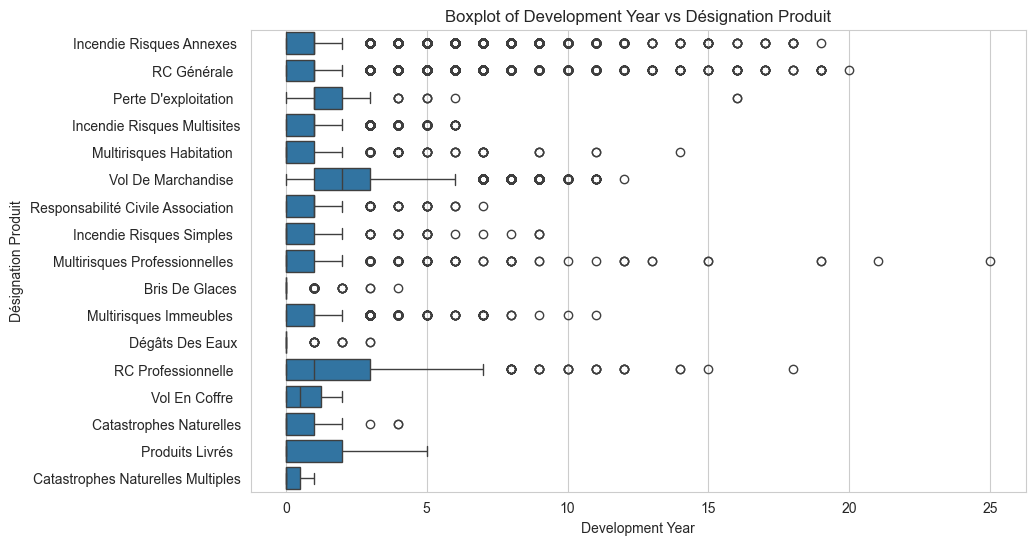

In [12]:
# for each value of development year, print its unique Code Produit values
for dev_year in df["Development Year"].unique():
    if dev_year < 15:
        continue
    print(f"Development Year: {dev_year}")
    print(df[df["Development Year"] == dev_year]["Désignation Produit"].unique())
    print()
    
# plot the relationship between dev year and designation produit
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="Development Year", y="Désignation Produit", data=df)
plt.title("Boxplot of Development Year vs Désignation Produit")
plt.show()


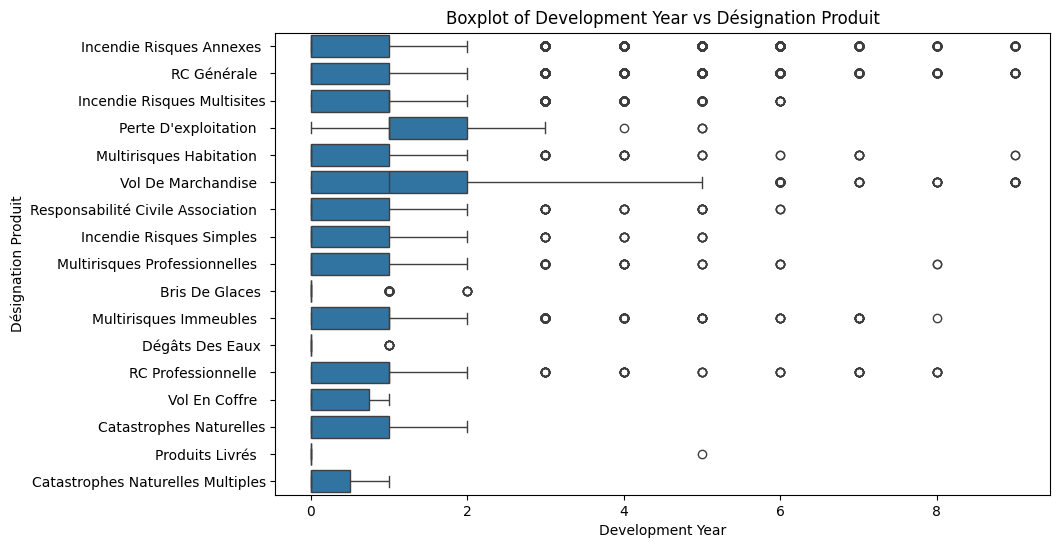

In [123]:
# remove rows with occurence year < 2014
df2 = df[df["Occurrence Year"] >= 2014]

plt.figure(figsize=(10, 6))
sns.boxplot(x="Development Year", y="Désignation Produit", data=df2)
plt.title("Boxplot of Development Year vs Désignation Produit")
plt.show()


In [13]:


# Aggregate claim settlements by Occurrence Year and Development Year
run_off_triangle = df.pivot_table(
    index="Occurrence Year", 
    columns="Development Year", 
    values="amount", 
    aggfunc="sum"
).fillna(0)  # Fill missing values with 0 (no settlement yet)

# Display the Run-Off Triangle
print(run_off_triangle)

# export to csv
run_off_triangle.to_csv("run_off_triangle.csv")

Development Year            0             1             2             3   \
Occurrence Year                                                            
1998              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
1999              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2001              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2002              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2003              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2004              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2005              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2006              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2007              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2008              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2009              0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2010        

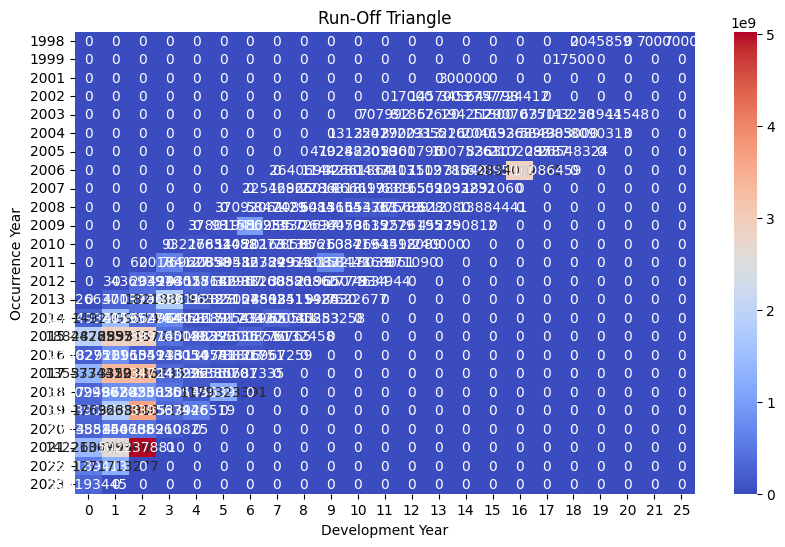

In [125]:
# visualise the run off triangle
plt.figure(figsize=(10, 6))
sns.heatmap(run_off_triangle, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Run-Off Triangle")
plt.show()


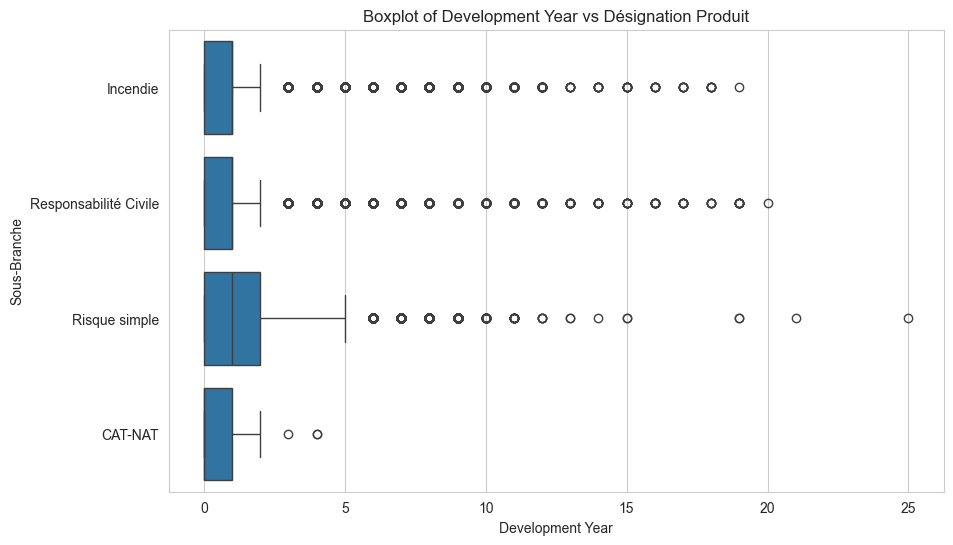

In [14]:
# in the triangle, keep only years from 2014 to 2023
run_off_triangle = run_off_triangle.loc[2014:2023]

Text(0.5, 1.0, 'Number of Rows per Sous-Branche')

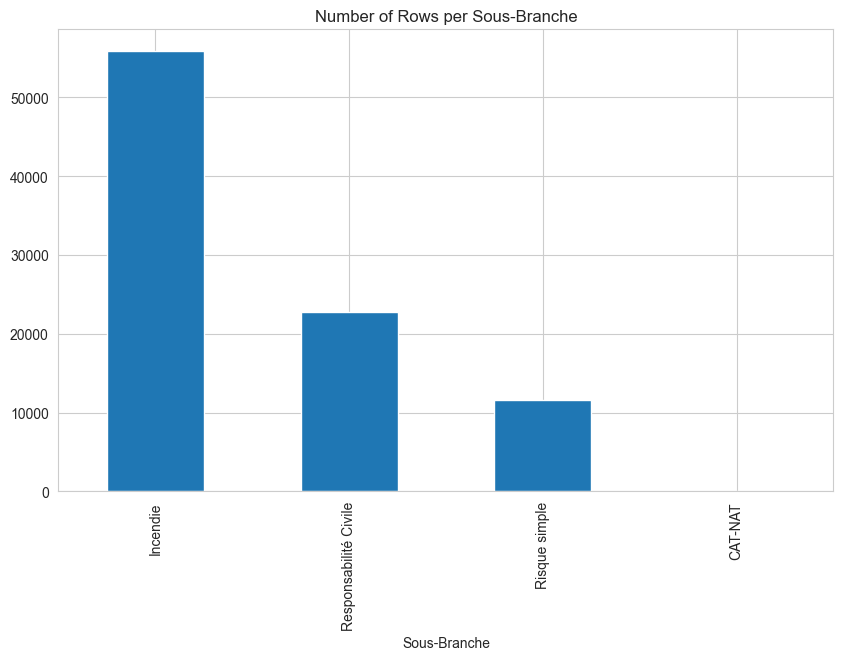

In [15]:
# Function to compute development factors
def compute_chain_ladder_factors(triangle):
    factors = []
    for col in range(triangle.shape[1] - 1):
        known_values = triangle.iloc[:, col].replace(0, np.nan).dropna()
        next_values = triangle.iloc[:, col + 1].replace(0, np.nan).dropna()
        
        valid_indices = known_values.index.intersection(next_values.index)
        if len(valid_indices) > 0:
            factor = (next_values.loc[valid_indices] / known_values.loc[valid_indices]).mean()
            factors.append(factor)
        else:
            factors.append(1)  # Default factor if no data is available

    return factors

# Compute development factors
dev_factors = compute_chain_ladder_factors(run_off_triangle)
print("Development Factors:", dev_factors)

# Function to apply chain-ladder projection
def apply_chain_ladder(triangle, dev_factors):
    triangle = triangle.copy()
    for col in range(triangle.shape[1] - 1):
        missing_rows = triangle.index[triangle.iloc[:, col + 1] == 0]  # Find missing values
        for row in missing_rows:
            if row in triangle.index:
                triangle.loc[row, col + 1] = triangle.loc[row, col] * dev_factors[col]  # Apply growth factor
    return triangle

# Apply Chain-Ladder model
completed_triangle1 = apply_chain_ladder(run_off_triangle, dev_factors)

# Display the completed Run-Off Triangle
print("\nCompleted Run-Off Triangle:")
print(completed_triangle1)


([0, 1, 2, 3],
 [Text(0, 0, 'Incendie'),
  Text(1, 0, 'Responsabilité Civile'),
  Text(2, 0, 'Risque simple'),
  Text(3, 0, 'CAT-NAT')])

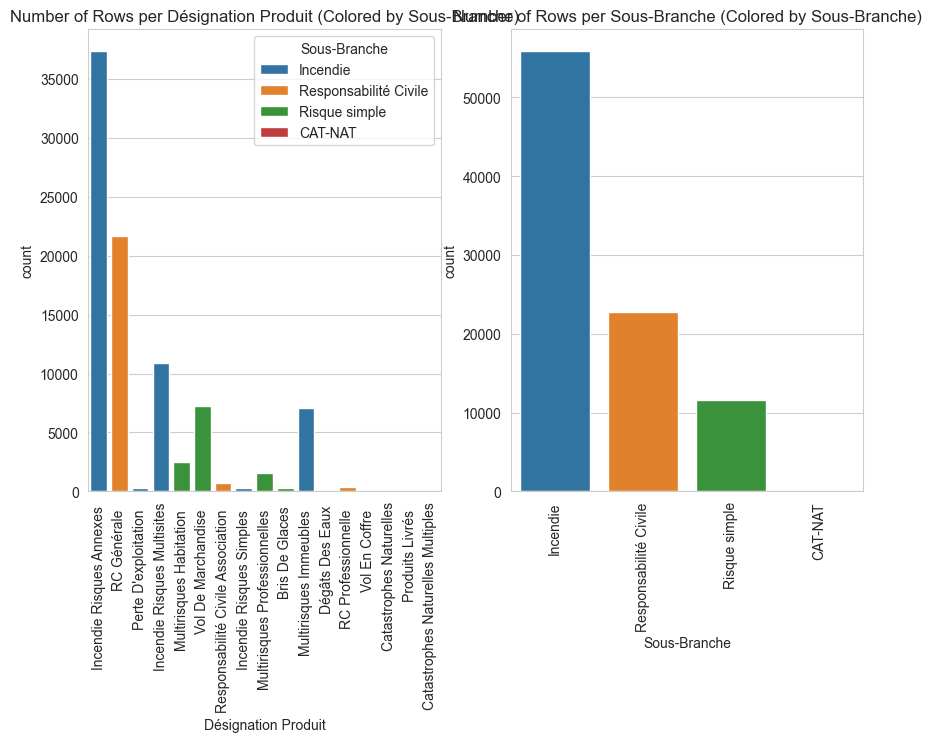

In [21]:
# visualise the completed run off triangle
plt.figure(figsize=(16, 10))
sns.heatmap(completed_triangle1, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Completed Run-Off Triangle")
plt.show()

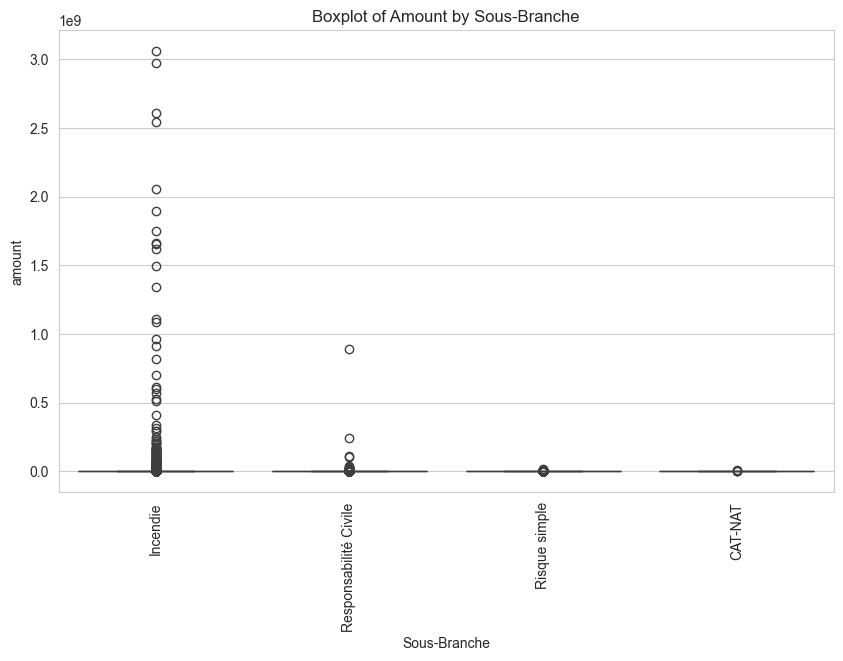

In [22]:
# export to csv
completed_triangle1.to_csv("completed_run_off_triangle.csv")

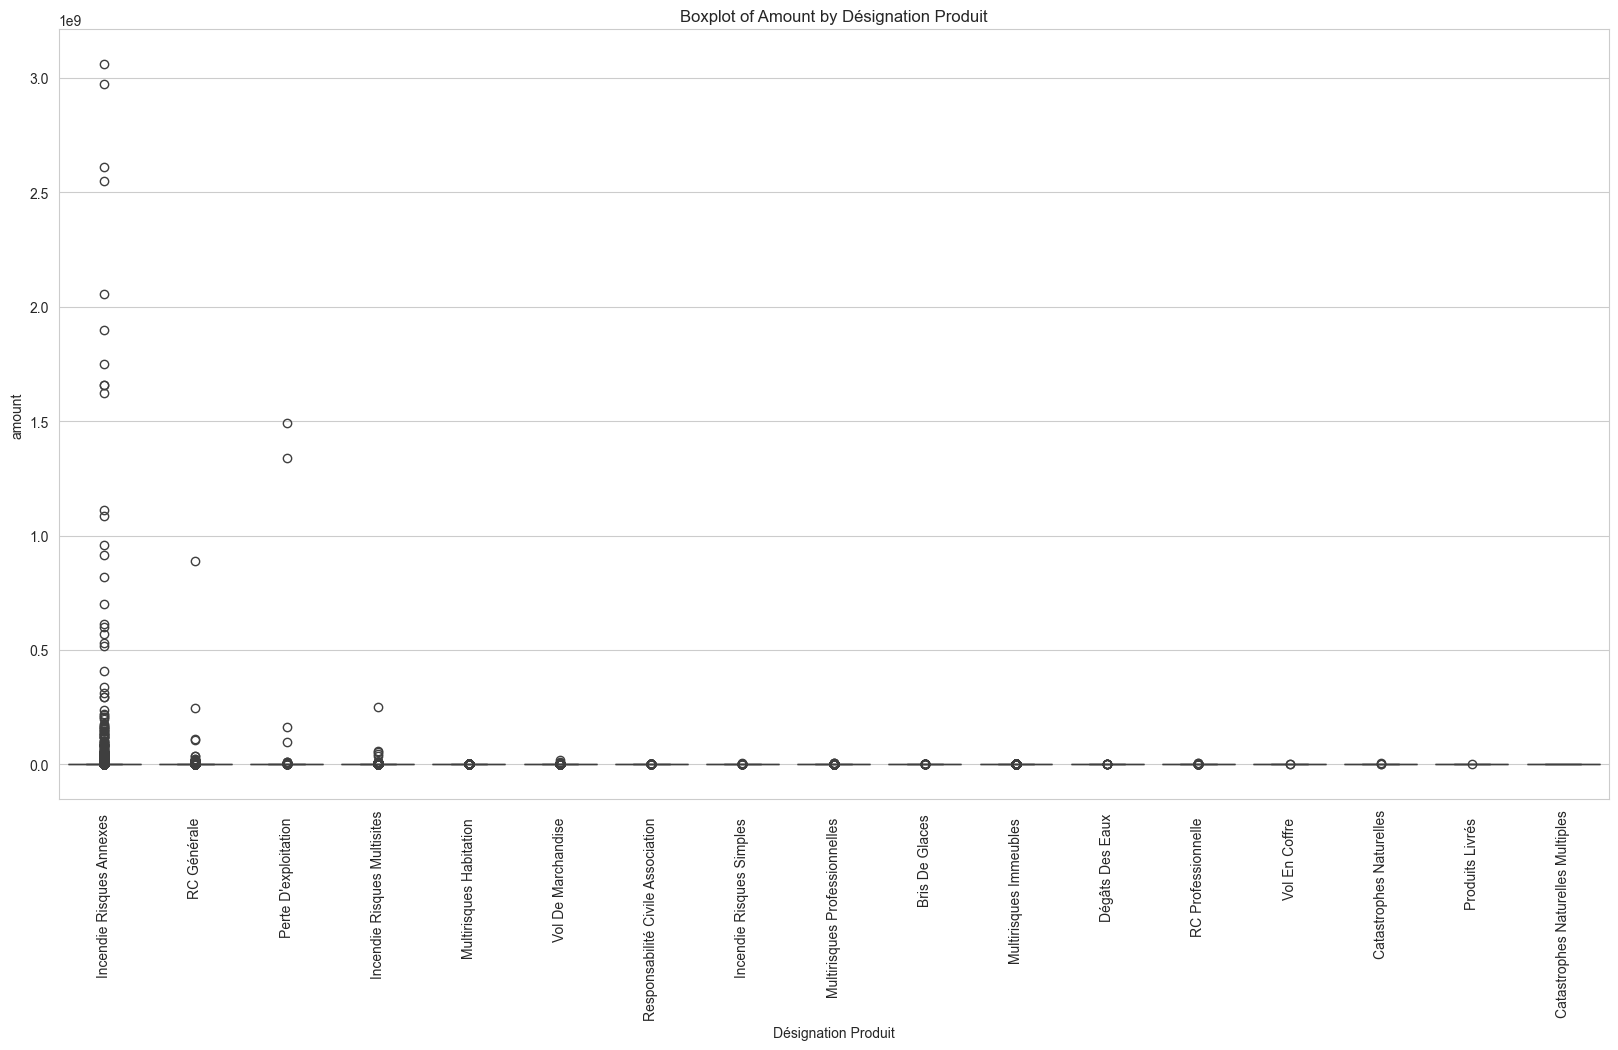

In [29]:
data = []
for year in run_off_triangle.index:
    for dev_year in run_off_triangle.columns:
        past_claims = run_off_triangle.loc[year, dev_year]
        if past_claims == 0:
            future_claims = np.nan  # Mark missing values
        else:
            future_claims = run_off_triangle.loc[year, dev_year + 1] if dev_year + 1 in run_off_triangle.columns else np.nan
        data.append([year, dev_year, past_claims, future_claims])

df2 = pd.DataFrame(data, columns=["Occurrence Year", "Development Year", "Past Claims", "Future Claims"])



<Figure size 3000x2000 with 0 Axes>

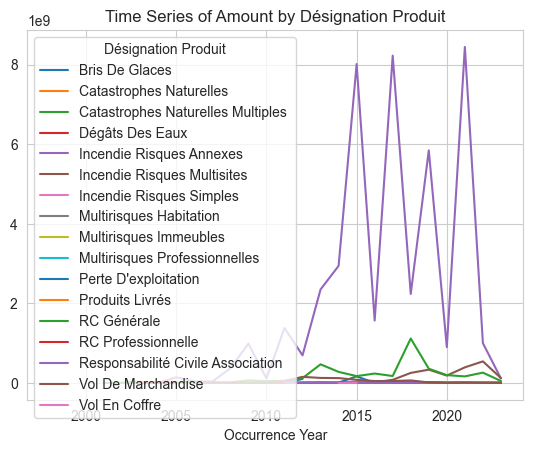

In [32]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.linear_model import LinearRegression

# Remove rows where future claims are missing (for training)
train_data = df2.dropna()

# Train-Test Split
X = train_data[["Occurrence Year", "Development Year", "Past Claims"]]
y = train_data["Future Claims"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate model
train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
print("Train R^2 Score:", train_score)
print("Test R^2 Score:", test_score)

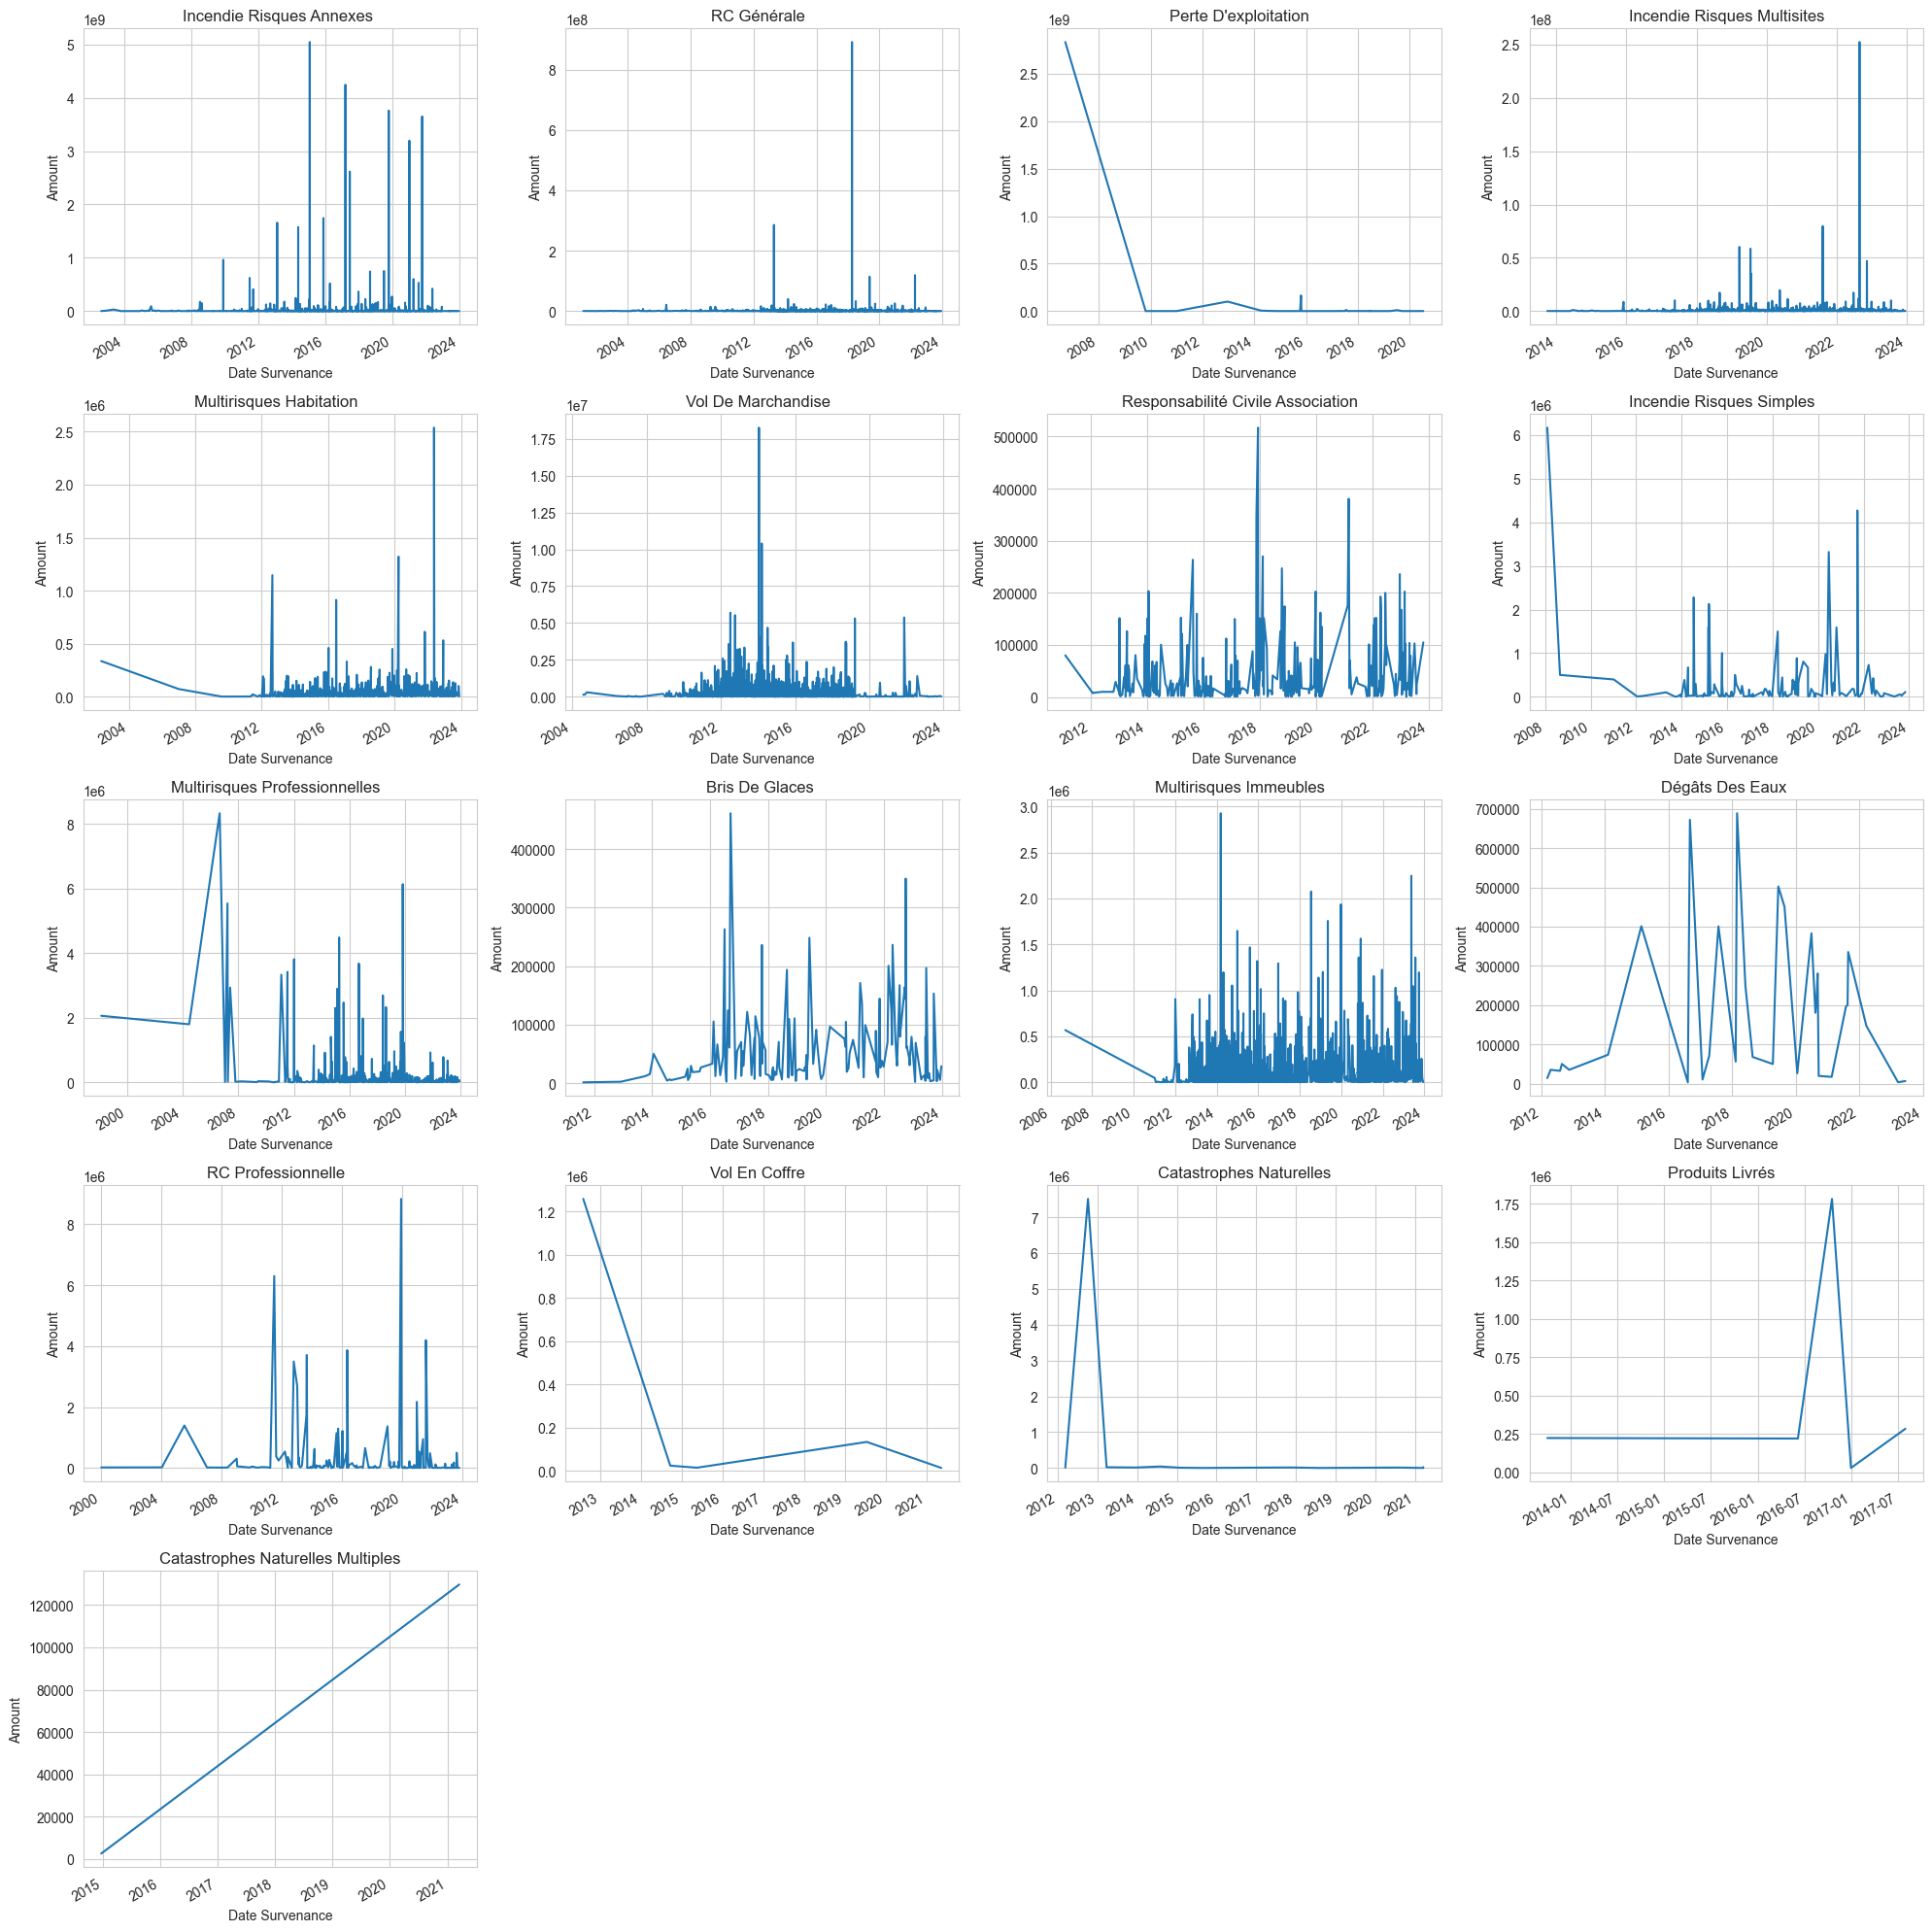

In [39]:

# Predict missing values
missing_data = df2[df2["Future Claims"].isna()]
X_missing = missing_data[["Occurrence Year", "Development Year", "Past Claims"]]
df2.loc[df2["Future Claims"].isna(), "Future Claims"] = model.predict(X_missing)

# Convert back to Run-Off Triangle format
completed_triangle2 = df2.pivot(index="Occurrence Year", columns="Development Year", values="Future Claims")

# Display completed Run-Off Triangle
print("\nCompleted Run-Off Triangle (ML-Based Forecasting):")
print(completed_triangle2)

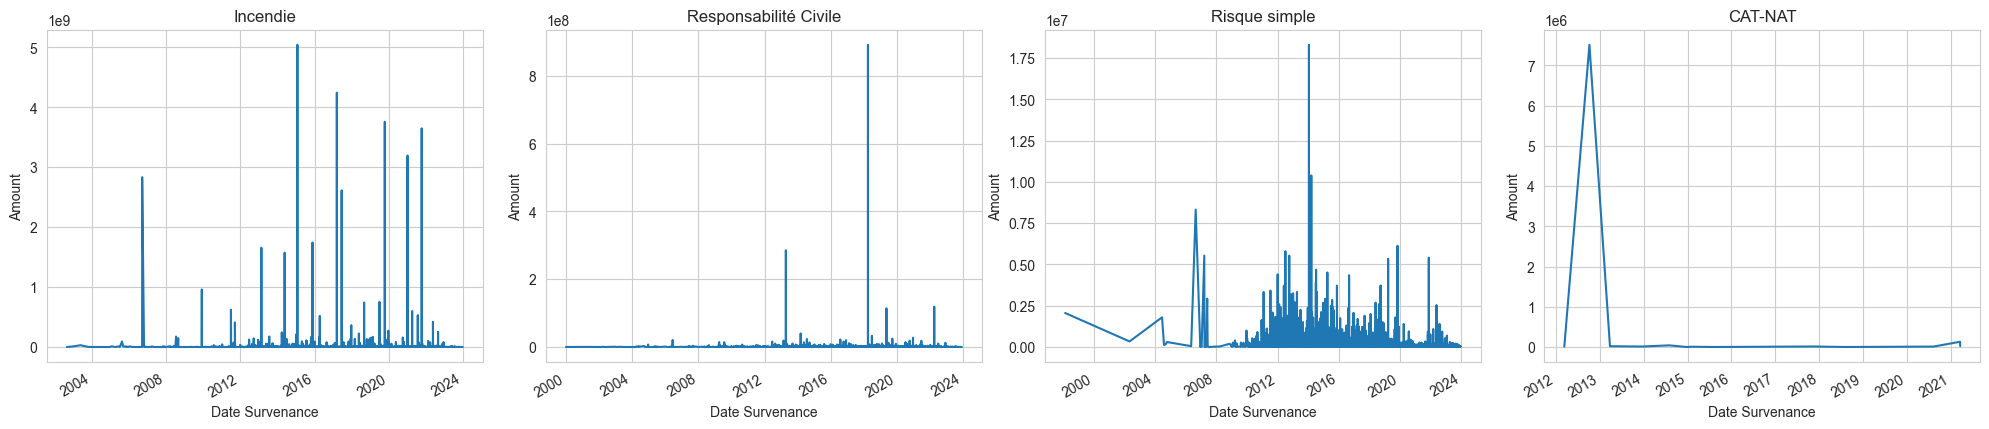

In [48]:
# export csv
completed_triangle2.to_csv("completed_run_off_triangle_ml.csv")

([0, 1, 2, 3],
 [Text(0, 0, 'Responsabilité Civile'),
  Text(1, 0, 'Incendie'),
  Text(2, 0, 'CAT-NAT'),
  Text(3, 0, 'Risque simple')])

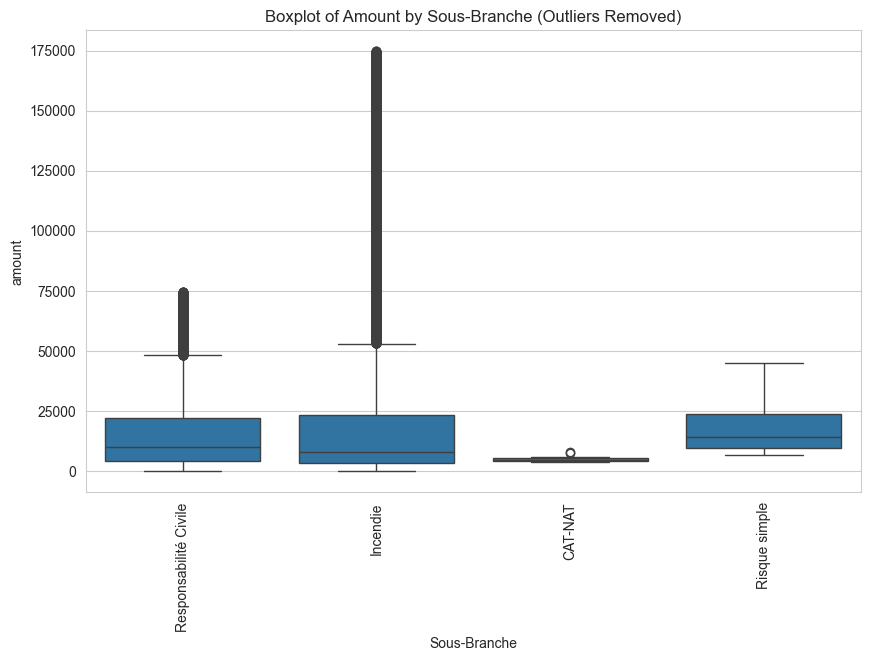

In [51]:
# compare the 2 triangles by calculating the difference in the lower triangle
diff = completed_triangle1 - completed_triangle2

diff_lower = np.tril(diff)
print("Difference in Lower Triangle:")
print(diff_lower)

# Display the difference in the lower triangle
plt.figure(figsize=(16, 10))
sns.heatmap(diff_lower, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Difference in Lower Triangle")
plt.show()

# Modeling

In [9]:
df = pd.read_csv("data.csv")

# Convert 'Date Survenance' to datetime and extract 'Survenance_Year'
df["Date Survenance"] = pd.to_datetime(df["Date Survenance"], format="%d/%m/%Y")
df["Survenance_Year"] = df["Date Survenance"].dt.year

df.rename(columns={" Règlement": "Règlement"}, inplace=True)


# Convert 'Règlement' to numeric by stripping spaces and commas
df["Règlement"] = df["Règlement"].astype(str).str.replace(" ", "").str.replace(",", "").astype(float)


# Convert 'Exercice' to int (Settlement Year)
df['Exercice '] = df['Exercice '].astype(int)

# Compute 'Development Lag' (years between claim occurrence & settlement)
df['Lag'] = df['Exercice '] - df['Date Survenance'].dt.year


# Filter data: Exclude rows where Survenance_Year < 2014
df_filtered = df[df["Survenance_Year"] >= 2014]

# Display the cleaned data
df_filtered

,Exercice,Branche,Code Produit,Désignation Produit,Sous-Branche,Date Survenance,Règlement,Survenance_Year,Lag
0,2021,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2019-10-14,3.058432e+09,2019,2
1,2018,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-03-14,2.972783e+09,2017,1
2,2019,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2017-06-17,2.611499e+09,2017,2
3,2016,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2015-01-27,2.547476e+09,2015,1
4,2022,Risques Industriels,IN,Incendie Risques Annexes,Incendie,2021-01-04,2.057632e+09,2021,1
...,...,...,...,...,...,...,...,...,...
90219,2014,Risques Industriels,MH,Multirisques Habitation,Risque simple,2014-02-04,1.310000e+03,2014,0
90221,2015,Risques Industriels,RN,Responsabilité Civile Association,Responsabilité Civile,2015-02-08,1.300000e+03,2015,0
90222,2022,Risques Industriels,MH,Multirisques Habitation,Risque simple,2021-11-27,1.270000e+03,2021,1
90223,2014,Risques Industriels,RP,RC Professionnelle,Responsabilité Civile,2014-10-02,1.270000e+03,2014,0


In [10]:
df_filtered.groupby("Sous-Branche")["Code Produit"].value_counts()


Sous-Branche           Code Produit
CAT-NAT                CN                 23
                       CM                  3
Incendie               IN              33563
                       IM              10894
                       MI               5966
                       PE                280
                       IS                275
Responsabilité Civile  RG              19495
                       RN                586
                       RP                319
                       RR                  6
Risque simple          VM               4241
                       MH               2320
                       MP               1381
                       BG                283
                       DE                 52
                       VC                  6
Name: count, dtype: int64

In [11]:
code_produit_mapping = df.groupby("Code Produit")["Désignation Produit"].first().to_dict()
code_produit_mapping

{'BG': 'Bris De Glaces ',
 'CM': 'Catastrophes Naturelles Multiples',
 'CN': 'Catastrophes Naturelles',
 'DE': 'Dégâts Des Eaux ',
 'IM': 'Incendie Risques Multisites',
 'IN': 'Incendie Risques Annexes ',
 'IS': 'Incendie Risques Simples  ',
 'MH': 'Multirisques Habitation  ',
 'MI': 'Multirisques Immeubles  ',
 'MP': 'Multirisques Professionnelles  ',
 'PE': "Perte D'exploitation  ",
 'RG': 'RC Générale  ',
 'RN': 'Responsabilité Civile Association  ',
 'RP': 'RC Professionnelle  ',
 'RR': 'Produits Livrés  ',
 'VC': 'Vol En Coffre  ',
 'VM': 'Vol De Marchandise  '}

## Synthetic Data Generation
- simulate data based on the distribution of the original data
- this allows us to generate more data for training models for dates from 1998 ti 2013 that was truncated from the given dataset

In [12]:
import numpy as np
import pandas as pd
from scipy.stats import gamma

# Convert 'Date Survenance' to datetime and extract 'Survenance_Year'
df["Date Survenance"] = pd.to_datetime(df["Date Survenance"], format="%d/%m/%Y")
df["Survenance_Year"] = df["Date Survenance"].dt.year

df.rename(columns={" Règlement": "Règlement"}, inplace=True)

# Convert 'Règlement' to numeric
df["Règlement"] = df["Règlement"].astype(str).str.replace(" ", "").str.replace(",", "").astype(float)

# Convert 'Exercice' to int
df['Exercice '] = df['Exercice '].astype(int)

df["Lag"] = df["Exercice "] - df["Survenance_Year"]

# Fit a Gamma distribution to claim amounts
shape, loc, scale = gamma.fit(df["Règlement"], floc=0)

# Estimate probability distributions
survenance_year_probs = df["Survenance_Year"].value_counts(normalize=True)
lag_probs = df["Lag"].value_counts(normalize=True)



# Define categorical dependencies
category_hierarchy = {
    "CAT-NAT": ["CN", "CM"],
    "Incendie": ["IN", "IM", "MI", "PE", "IS"],
    "Responsabilité Civile": ["RG", "RN", "RP", "RR"],
    "Risque simple": ["VM", "MH", "MP", "BG", "DE", "VC"]
}

# Compute probabilities of Sous-Branche
sous_branche_probs = df["Sous-Branche"].value_counts(normalize=True)

# Compute conditional probabilities of Code Produit given Sous-Branche
code_produit_probs = {
    sous_branche: df[df["Sous-Branche"] == sous_branche]["Code Produit"].value_counts(normalize=True)
    for sous_branche in category_hierarchy
}

ratio = 2
n_samples = len(df) // ratio  # Adjust sample size based on dataset size
simulated_data = []

num_samples_per_row = 1  # Number of generations per row to average

# set random seed
np.random.seed(0)

for _ in range(n_samples):
    # Sample categorical values once (consistent across generations)
    sous_branche = np.random.choice(sous_branche_probs.index, p=sous_branche_probs.values)
    if sous_branche in code_produit_probs:
        code_produit = np.random.choice(code_produit_probs[sous_branche].index, p=code_produit_probs[sous_branche].values)
    else:
        code_produit = np.random.choice(category_hierarchy[sous_branche])  # Default fallback

    # Generate multiple candidates for averaging
    lags = [np.random.choice(lag_probs.index, p=lag_probs.values) for _ in range(num_samples_per_row)]
    claim_amounts = [gamma.rvs(shape, loc=0, scale=scale) for _ in range(num_samples_per_row)]

    # Compute the average values
    avg_lag = round(np.mean(lags))
    avg_montant = np.mean(claim_amounts)

    # Generate synthetic date
    month = np.random.randint(1, 13)
    day = np.random.randint(1, 29)
    year = np.random.randint(1998, 2014)

    row = {
        "Sous-Branche": sous_branche,
        "Code Produit": code_produit,
        "Exercice": year,
        "Lag": avg_lag,
        "Branche": "Risques Industriels",
        "Désignation Produit": code_produit_mapping[code_produit],
        "Survenance_Year": year - avg_lag,
        "Date Survenance": f"{year - avg_lag}-{month}-{day}",
        "Règlement": avg_montant
    }
    simulated_data.append(row)

# Convert to DataFrame
simulated_df = pd.DataFrame(simulated_data)

# Recalculate Lag after averaging
simulated_df["Lag"] = simulated_df["Exercice"] - pd.to_datetime(simulated_df["Date Survenance"]).dt.year
simulated_df


,Sous-Branche,Code Produit,Exercice,Lag,Branche,Désignation Produit,Survenance_Year,Date Survenance,Règlement
0,Incendie,IM,2002,1,Risques Industriels,Incendie Risques Multisites,2001,2001-6-19,1.479793e+05
1,Incendie,IN,2003,0,Risques Industriels,Incendie Risques Annexes,2003,2003-9-18,7.662364e+04
2,Responsabilité Civile,RG,2001,1,Risques Industriels,RC Générale,2000,2000-1-19,2.087037e+04
3,Responsabilité Civile,RG,2013,1,Risques Industriels,RC Générale,2012,2012-10-26,7.142480e+01
4,Responsabilité Civile,RG,1998,1,Risques Industriels,RC Générale,1997,1997-3-1,6.928265e+02
...,...,...,...,...,...,...,...,...,...
45109,Responsabilité Civile,RG,2009,0,Risques Industriels,RC Générale,2009,2009-11-11,2.423792e+05
45110,Incendie,IM,1998,2,Risques Industriels,Incendie Risques Multisites,1996,1996-2-13,1.389110e+06
45111,Incendie,IN,2003,0,Risques Industriels,Incendie Risques Annexes,2003,2003-10-21,3.562078e+05
45112,Incendie,MI,2011,1,Risques Industriels,Multirisques Immeubles,2010,2010-10-7,3.134572e-02


## Evaluating the generated data

KS Statistic: 0.4375631645742087, p-value: 0.0


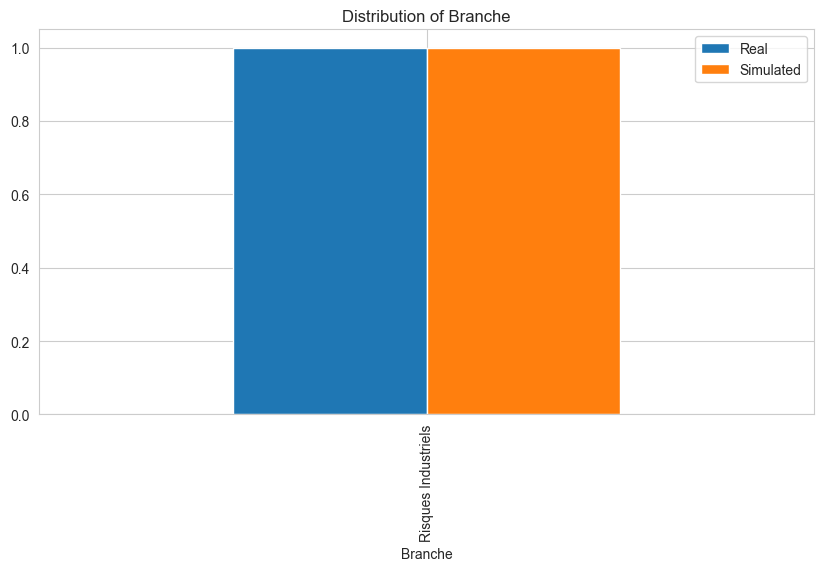

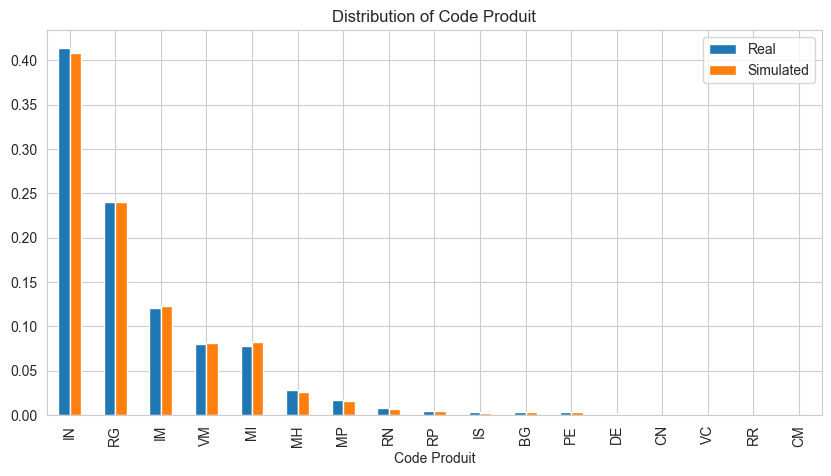

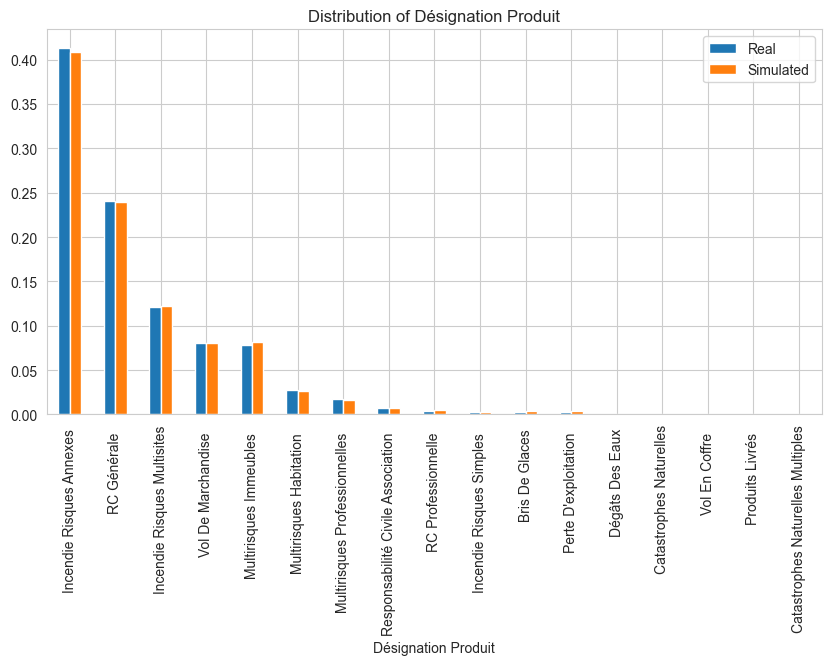

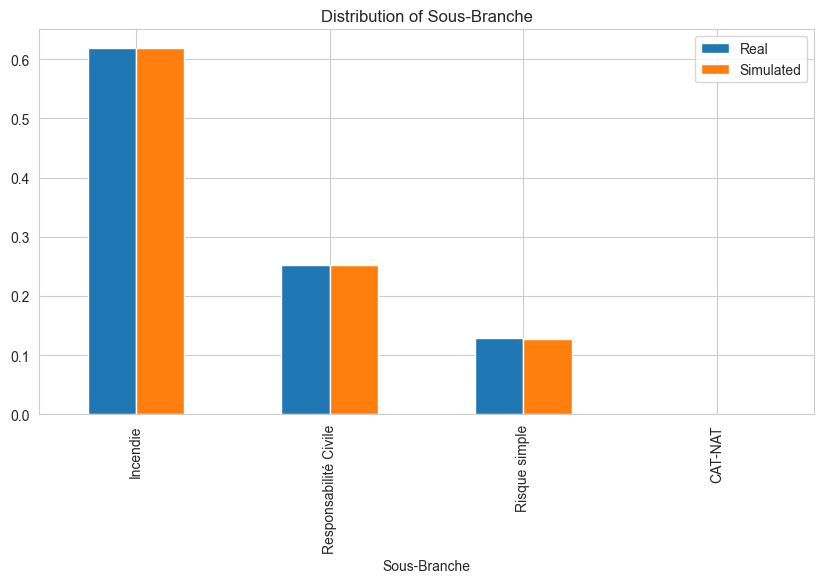

Chi2 Test for Code Produit: p-value = 0.6519970359031892
Chi2 Test for Désignation Produit: p-value = 0.6519970359031892
Chi2 Test for Sous-Branche: p-value = 0.9839145004151764


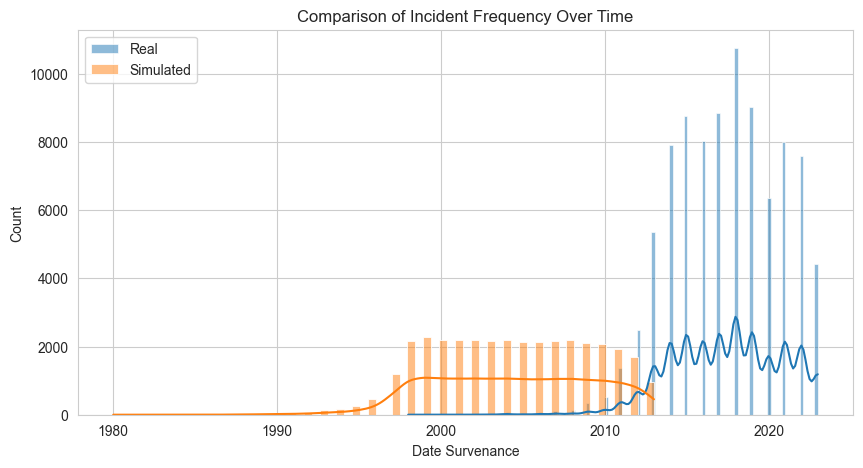

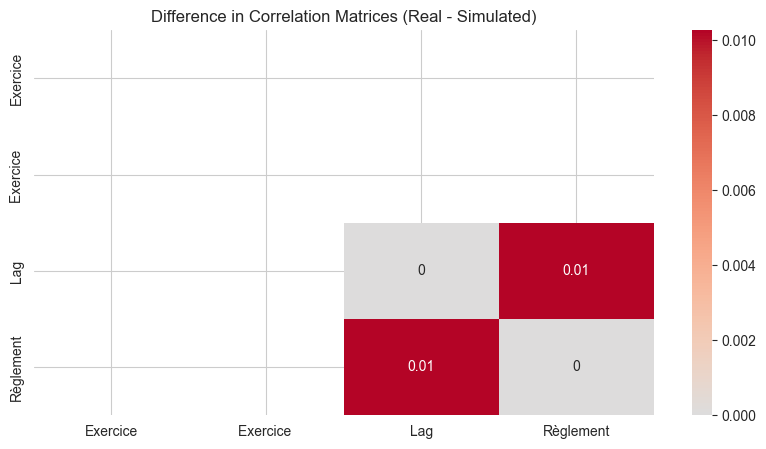

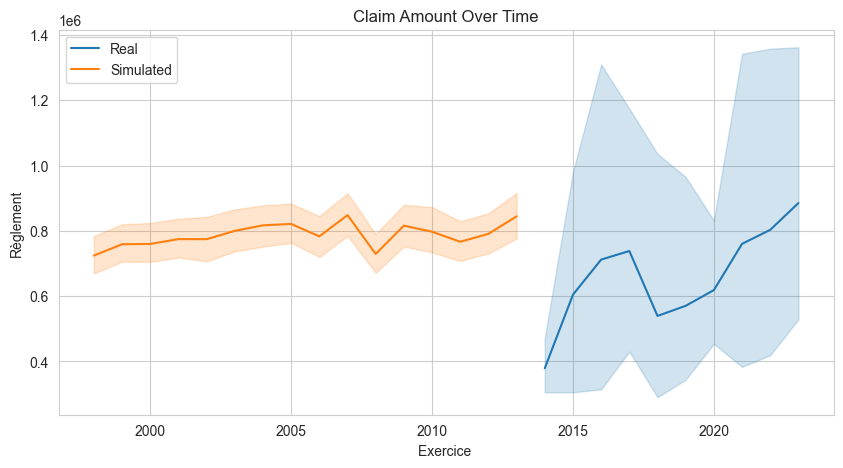

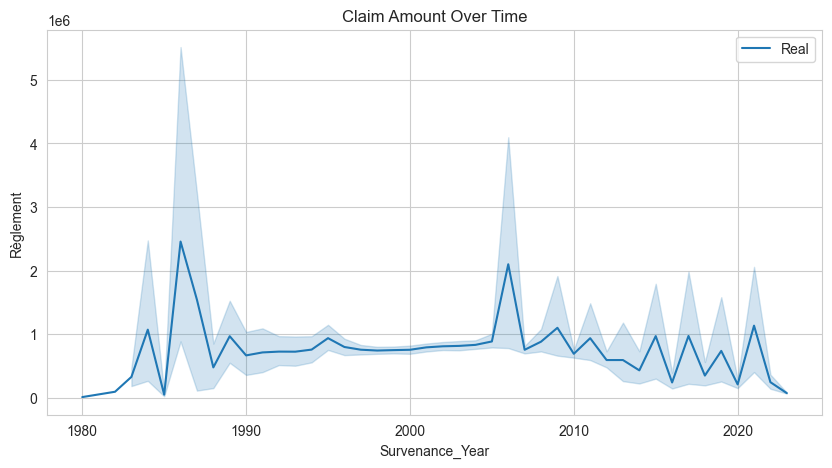

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gamma, ks_2samp, chi2_contingency




# KS Test
ks_stat, p_value = ks_2samp(df["Règlement"], simulated_df["Règlement"])
print(f"KS Statistic: {ks_stat}, p-value: {p_value}")

# Categorical Distribution Comparison
for col in ["Branche", "Code Produit", "Désignation Produit", "Sous-Branche"]:
    real_dist = df[col].value_counts(normalize=True)
    sim_dist = simulated_df[col].value_counts(normalize=True)
    comparison_df = pd.concat([real_dist, sim_dist], axis=1)
    comparison_df.columns = ["Real", "Simulated"]
    comparison_df.plot(kind="bar", figsize=(10, 5), title=f"Distribution of {col}")
    plt.show()

# Chi-Square Test
for col in ["Code Produit", "Désignation Produit", "Sous-Branche"]:
    real_counts = df[col].value_counts()
    sim_counts = simulated_df[col].value_counts()
    all_categories = real_counts.index.union(sim_counts.index)
    real_counts = real_counts.reindex(all_categories, fill_value=0)
    sim_counts = sim_counts.reindex(all_categories, fill_value=0)
    chi2_stat, p_val, _, _ = chi2_contingency([real_counts, sim_counts])
    print(f"Chi2 Test for {col}: p-value = {p_val}")

# Time-Series Analysis
plt.figure(figsize=(10, 5))
sns.histplot(df["Date Survenance"].dt.year, label="Real", kde=True)
sns.histplot(pd.to_datetime(simulated_df["Date Survenance"]).dt.year, label="Simulated", kde=True)
plt.legend()
plt.title("Comparison of Incident Frequency Over Time")
plt.show()

# elation Analysis
num_cols = df[["Règlement", "Exercice ", "Lag"]]
real_corr = num_cols.corr()
sim_corr = simulated_df[["Règlement", "Exercice", "Lag"]].corr()
plt.figure(figsize=(10, 5))
sns.heatmap(real_corr - sim_corr, cmap="coolwarm", center=0, annot=True)
plt.title("Difference in Correlation Matrices (Real - Simulated)")
plt.show()




# Train a Classifier to Distinguish Real vs. Simulated Data
combined_df = pd.concat([df, simulated_df])

simulated_df = simulated_df[simulated_df["Règlement"] > 1000]

# plot reglement by year
plt.figure(figsize=(10, 5))
sns.lineplot(data=combined_df, x="Exercice ", y="Règlement", label="Real")
sns.lineplot(data=simulated_df, x="Exercice", y="Règlement", label="Simulated")
plt.title("Claim Amount Over Time")
plt.show()


# plot reglement by year
plt.figure(figsize=(10, 5))
sns.lineplot(data=combined_df, x="Survenance_Year", y="Règlement", label="Real")
# sns.lineplot(data=simulated_df, x="Exercice", y="Règlement", label="Simulated")
plt.title("Claim Amount Over Time")
plt.show()


## Feature Engineering and Data Encoding

In [18]:
# extract day, month from survenance date
df["Survenance_Day"] = df["Date Survenance"].dt.day
df["Survenance_Month"] = df["Date Survenance"].dt.month

# encode categorical columns
df_encoded = pd.get_dummies(df, columns=["Code Produit", "Désignation Produit", "Sous-Branche"])


X = df_encoded.drop(columns=["Règlement", "Date Survenance", "Branche"])
y = df_encoded["Règlement"]

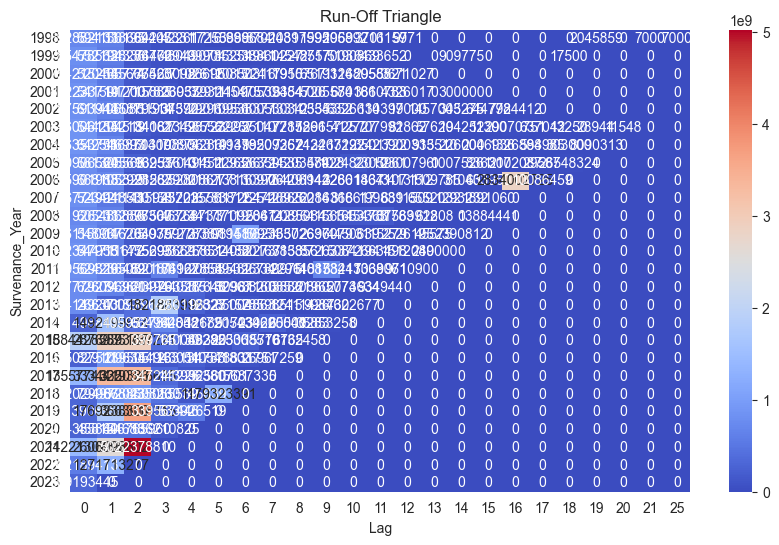

In [21]:
# remove rows that have Sur Year < 1998
combined_df = combined_df[combined_df["Survenance_Year"] >= 1998]

# create run off triangle
triangle = combined_df.pivot_table(index="Survenance_Year", columns="Lag", values="Règlement", aggfunc="sum").fillna(0)

plt.figure(figsize=(10, 6))
sns.heatmap(triangle, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Run-Off Triangle")
plt.show()

## Chain Ladder Method

In [22]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error

def chain_ladder(triangle):
    """
    Applies the Chain-Ladder method to complete a run-off triangle.
    """
    triangle = triangle.copy()
    n_periods = triangle.shape[1]
    
    # Compute development factors
    dev_factors = []
    for col in range(n_periods - 1):
        known_values = triangle.iloc[:, col].replace(0, np.nan).dropna()
        next_values = triangle.iloc[:, col + 1].replace(0, np.nan).dropna()
        
        valid_indices = known_values.index.intersection(next_values.index)
        if len(valid_indices) > 0:
            factor = (next_values.loc[valid_indices] / known_values.loc[valid_indices]).mean()
            dev_factors.append(factor)
        else:
            dev_factors.append(1.0)  # Default to 1 if no valid data available

    # Apply Chain-Ladder method
    for col in range(n_periods - 1):
        missing_rows = triangle.index[triangle.iloc[:, col + 1] == 0]  
        for row in missing_rows:
            if row in triangle.index:
                triangle.loc[row, col + 1] = triangle.loc[row, col] * dev_factors[col]  

    return triangle

def set_second_diagonal_to_zero(matrix):
    matrix = np.array(matrix)  # Ensure it's a NumPy array
    rows, cols = matrix.shape

    for i in range(min(rows, cols)):
        j = cols - 1 - i  # Compute anti-diagonal index
        matrix[i, j] = 0

    return pd.DataFrame(matrix)

def evaluate_chain_ladder(triangle):
    """
    Evaluates the Chain-Ladder method by removing the last diagonal,
    predicting them, and comparing with actual values.

    Parameters:
    triangle (pd.DataFrame): The original run-off triangle.

    Returns:
    dict: Evaluation metrics (MAE, MAPE, RMSE)
    """
    triangle = triangle.copy()

    # Mask the last two diagonals
    n_periods = triangle.shape[1]
    masked_triangle = triangle.copy()
    
    # Set the diagonal values to 0 as described
    for row in triangle.index:
        last_known_col = triangle.loc[row, :].replace(0, np.nan).last_valid_index()  # Find last known value
        # Mask the last known value except for the row with only 1 value
        if last_known_col in masked_triangle.columns and len(masked_triangle.loc[row, :].dropna()) > 1:
            masked_triangle.loc[row, last_known_col] = 0  # Mask it

    # Apply Chain-Ladder on the masked triangle
    predicted_triangle = chain_ladder(masked_triangle)

    # Extract actual vs predicted values for the masked diagonals
    actual_values = []
    predicted_values = []
    
    for row in triangle.index:
        last_known_col = triangle.loc[row, :].replace(0, np.nan).last_valid_index()  # Find last known value
        if last_known_col in triangle.columns:
            actual_value = triangle.loc[row, last_known_col]
            predicted_value = predicted_triangle.loc[row, last_known_col]
            if actual_value > 0:  # Ignore missing original values
                actual_values.append(actual_value)
                predicted_values.append(predicted_value)
            

 

    # Compute error metrics
    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    mape = np.mean(np.abs((np.array(actual_values) - np.array(predicted_values)) / np.array(actual_values))) * 100
    

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape
    }

In [23]:
triangle = combined_df.pivot_table(index="Survenance_Year", columns="Lag", values="Règlement", aggfunc="sum").fillna(0)

# Evaluate Chain-Ladder
evaluation_results = evaluate_chain_ladder(triangle)

print(f"Chain-Ladder Evaluation Results: //{ratio}")
print(evaluation_results)

Chain-Ladder Evaluation Results: //2
{'MAE': 332498681.36832243, 'RMSE': 796401453.550757, 'MAPE (%)': 105165.6394297775}


## Machine Learning Model
- first we need to prepare the data, converting the run off triangle to a supervised learning problem

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import xgboost as xgb
import lightgbm as lgb


# Convert Run-Off Triangle into Tabular Format
data = []
for year in triangle.index:
    for dev_year in triangle.columns:
        past_claims = triangle.loc[year, dev_year]
        if past_claims == 0:
            future_claims = np.nan  # Mark missing values
        else:
            future_claims = triangle.loc[year, dev_year + 1] if dev_year + 1 in triangle.columns else np.nan
        data.append([year, dev_year, past_claims, future_claims])

df2 = pd.DataFrame(data, columns=["Occurrence Year", "Development Year", "Past Claims", "Future Claims"])

# Remove rows where future claims are missing (for training)
df_train = df2.dropna()

# Train-Test Split
X = df_train[["Occurrence Year", "Development Year", "Past Claims"]]
y = df_train["Future Claims"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective="reg:squarederror")
xgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Errors
def evaluate_model(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f"\n📌 {model_name} Evaluation:")
    print(f"  - Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  - Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"  - R² Score: {r2:.2f}")

evaluate_model(y_test, y_pred_xgb, "XGBoost")


📌 XGBoost Evaluation:
  - Mean Absolute Error (MAE): 159651538.39
  - Root Mean Squared Error (RMSE): 433852734.62
  - R² Score: 0.71


In [25]:
def predict_lower_triangle(triangle, xgb_model):
    """
    Uses an XGBoost model to predict missing values (zeros) in the lower triangle
    while keeping the upper triangle values unchanged.

    Parameters:
    triangle (pd.DataFrame): The run-off triangle with missing values as zeros.
    xgb_model (XGBRegressor): The trained XGBoost model.

    Returns:
    pd.DataFrame: A new triangle with predicted values in the lower section.
    """
    new_triangle = triangle.copy()  # Keep the original values

    data_to_predict = []

    for year in triangle.index:
        for lag in triangle.columns:
            if triangle.loc[year, lag] == 0:  # Identify missing values (lower triangle)
                past_claims = triangle.loc[year, lag - 1] if lag - 1 in triangle.columns else 0
                data_to_predict.append([year, lag, past_claims])

    if not data_to_predict:
        print("No missing values to predict.")
        return new_triangle

    # Convert to DataFrame
    df_predict = pd.DataFrame(data_to_predict, columns=["Occurrence Year", "Development Year", "Past Claims"])

    # Predict missing values using XGBoost
    df_predict["Predicted Claims"] = xgb_model.predict(df_predict[["Occurrence Year", "Development Year", "Past Claims"]])

    # Fill in the lower triangle with predicted values
    for _, row in df_predict.iterrows():
        new_triangle.loc[row["Occurrence Year"], row["Development Year"]] = row["Predicted Claims"]

    return new_triangle

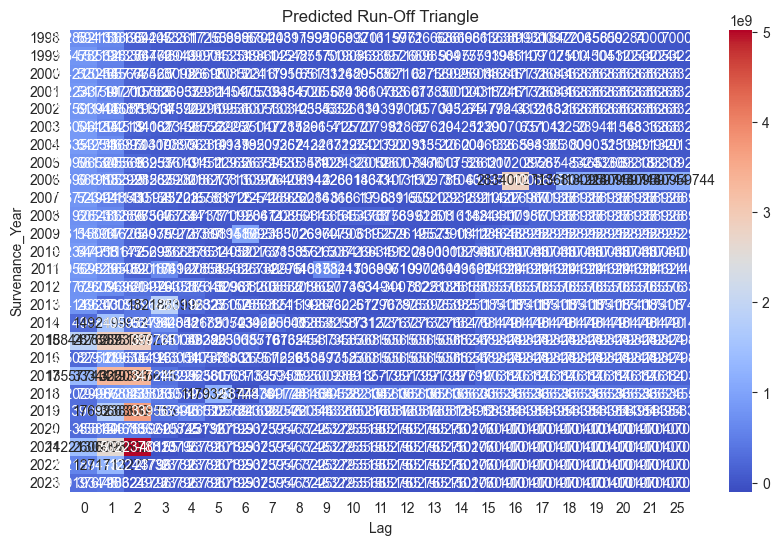

In [26]:
predicted_triangle = predict_lower_triangle(triangle, xgb_model)

# visualize the predicted triangle
plt.figure(figsize=(10, 6))
sns.heatmap(predicted_triangle, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Predicted Run-Off Triangle")
plt.show()

In [31]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_xgb_2023(triangle, xgb_model):
    """
    Evaluates XGBoost by masking the inverted diagonal of year 2023, predicting it,
    and comparing predictions with actual values.

    Parameters:
    triangle (pd.DataFrame): The original run-off triangle.
    xgb_model (XGBRegressor): Trained XGBoost model.

    Returns:
    dict: Evaluation metrics (MAE, RMSE, MAPE).
    """
    triangle = triangle.copy()
    masked_triangle = triangle.copy()

    year_to_mask = 2023
    actual_values = []
    predicted_values = []
    data_to_predict = []

    # Mask the inverted diagonal (last nonzero values for each column)
    for lag in reversed(triangle.columns):
        if year_to_mask in triangle.index and triangle.loc[year_to_mask, lag] > 0:
            actual_value = triangle.loc[year_to_mask, lag]
            actual_values.append(actual_value)

            # Get past claims (previous development year in the same occurrence year)
            past_claims = masked_triangle.loc[year_to_mask, lag - 1] if (lag - 1) in triangle.columns else 0
            data_to_predict.append([year_to_mask, lag, past_claims])

            # Mask the value
            masked_triangle.loc[year_to_mask, lag] = 0  

    if not data_to_predict:
        print("No values to predict in year 2023 diagonal.")
        return None

    # Convert to DataFrame
    df_predict = pd.DataFrame(data_to_predict, columns=["Occurrence Year", "Development Year", "Past Claims"])

    # Predict using XGBoost
    df_predict["Predicted Claims"] = xgb_model.predict(df_predict[["Occurrence Year", "Development Year", "Past Claims"]])

    # Store predictions and fill back the masked triangle
    for _, row in df_predict.iterrows():
        masked_triangle.loc[row["Occurrence Year"], row["Development Year"]] = row["Predicted Claims"]
        predicted_values.append(row["Predicted Claims"])

    # Compute error metrics
    mae = mean_absolute_error(actual_values, predicted_values)
    rmse = np.sqrt(mean_squared_error(actual_values, predicted_values))
    mape = np.mean(np.abs((np.array(actual_values) - np.array(predicted_values)) / np.array(actual_values))) * 100

    # Save results for comparison
    masked_triangle.to_csv("xgb_masked_triangle_2023.csv")
    triangle.to_csv("xgb_original_triangle_2023.csv")

    return {
        "MAE": mae,
        "RMSE": rmse,
        "MAPE (%)": mape
    }

# Example: Evaluate XGBoost on 2023 diagonal
xgb_eval_results = evaluate_xgb_2023(triangle, xgb_model)

# Display results
print("XGBoost Evaluation on 2023 Diagonal:")
print(xgb_eval_results)

# Compare with chain ladder results
if 'evaluation_results' in globals():
    print(f"Difference in evaluation results between chain ladder and XGBoost: {xgb_eval_results['RMSE'] - evaluation_results['RMSE']}")


XGBoost Evaluation on 2023 Diagonal:
{'MAE': 316291622.72, 'RMSE': 316291622.72, 'MAPE (%)': 102.2957076256741}

difference in evaluation results between chain ladder and xgboost: -480109830.830757


## Modeling without simulating the past data


In [32]:
triangle2 = df.pivot_table(index="Survenance_Year", columns="Lag", values="Règlement", aggfunc="sum").fillna(0)

triangle2

Lag,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,25
Survenance_Year,,,,,,,,,,,,,,,,,,,,,
1998,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.00,0.00,0.00,0.000000e+00,0.00,0.00,2045859.12,0.0,7000.0,7000.0
1999,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.00,0.00,0.00,0.000000e+00,0.00,17500.00,0.00,0.0,0.0,0.0
2001,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,0.00,300000.00,0.00,0.000000e+00,0.00,0.00,0.00,0.0,0.0,0.0
2002,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,1457003.08,345275.00,644798.00,7.724412e+06,0.00,0.00,0.00,0.0,0.0,0.0
2003,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,57620.00,194251.70,11300.00,2.907075e+07,637011.94,43250.00,28944.00,11548.0,0.0,0.0
2004,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,0.000000e+00,...,935510.00,226000.00,2046935.80,1.326898e+06,584985.48,303000.00,8090312.91,0.0,0.0,0.0
2005,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.00,4.792800e+04,...,0.00,10075260.75,836307.19,2.102087e+06,29587.00,26548323.85,0.00,0.0,0.0,0.0
2006,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,26406942.38,1.144280e+06,...,1509785.23,31040.00,633950.21,2.834003e+09,10086458.86,0.00,0.00,0.0,0.0,0.0
2007,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.254287e+07,16926014.35,2.286318e+06,...,6552031.74,1293231.94,1891060.00,0.000000e+00,0.00,0.00,0.00,0.0,0.0,0.0


In [33]:
# Convert Run-Off Triangle into Tabular Format
data = []
for year in triangle2.index:
    for dev_year in triangle2.columns:
        past_claims = triangle2.loc[year, dev_year]
        if past_claims == 0:
            future_claims = np.nan  # Mark missing values
        else:
            future_claims = triangle2.loc[year, dev_year + 1] if dev_year + 1 in triangle2.columns else np.nan
        data.append([year, dev_year, past_claims, future_claims])

df3 = pd.DataFrame(data, columns=["Occurrence Year", "Development Year", "Past Claims", "Future Claims"])

# Remove rows where future claims are missing (for training)
df_train = df3.dropna()

# Train-Test Split
X = df_train[["Occurrence Year", "Development Year", "Past Claims"]]
y = df_train["Future Claims"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train an XGBoost Model
xgb_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, objective="reg:squarederror")
xgb_model.fit(X_train, y_train)

# Train a LightGBM Model
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1)
lgb_model.fit(X_train, y_train)

# Predict using XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# Predict using LightGBM
y_pred_lgb = lgb_model.predict(X_test)

# Calculate Errors
evaluate_model(y_test, y_pred_xgb, "XGBoost")

evaluate_model(y_test, y_pred_lgb, "LightGBM")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 90
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 3
[LightGBM] [Info] Start training from score 323584089.165097
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

# Conclusion
- the chain ladder method and machine learning models were used to predict the future claims
- the chain ladder method was used to predict the future claims by applying the chain ladder method to complete the run off triangle
- the machine learning models were used to predict the future claims by converting the run off triangle to a supervised learning problem
- the machine learning models performed better than the chain ladder method